# **import packages**
# 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt
import statsmodels.api as sm
import os
import math
from datetime import datetime
from datetime import timedelta

In [2]:
df=pd.read_csv('../input/supermarket-sales/supermarket_sales - Sheet1.csv')

# **explore the data**


In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.columns


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# **cleaning the data**

<!-- # * cleaning the data* -->

In [5]:
df=df.drop_duplicates(subset=['Invoice ID'])
#**First we remove the duplicates**


**I will make sure the data is uniqe**

In [6]:
df['Invoice ID'].nunique()



1000

**i will see what the  best selling Product line for each branch**

In [7]:
print(pd.pivot_table(df, index = 'Product line', columns = 'Branch' ,values = 'gross income' ,aggfunc ='count'))
print()


Branch                   A   B   C
Product line                      
Electronic accessories  60  55  55
Fashion accessories     51  62  65
Food and beverages      58  50  66
Health and beauty       47  53  52
Home and lifestyle      65  50  45
Sports and travel       59  62  45



**Discover the best selling branch**

In [8]:
b= df.groupby('Branch')[['gross income']].mean().reset_index()
b

,Branch,gross income
0,A,14.874001
1,B,15.232024
2,C,16.052367


<AxesSubplot:xlabel='Branch', ylabel='gross income'>

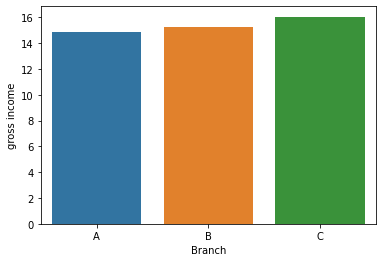

In [9]:
sns.barplot(x='Branch',y='gross income',data=b)

let's see which 

In [10]:
b=df.groupby('Product line')['gross income'].sum().reset_index()
b


,Product line,gross income
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
2,Food and beverages,2673.5640
3,Health and beauty,2342.5590
4,Home and lifestyle,2564.8530
5,Sports and travel,2624.8965


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Electronic accessories'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Food and beverages'),
  Text(3, 0, 'Health and beauty'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Sports and travel')])

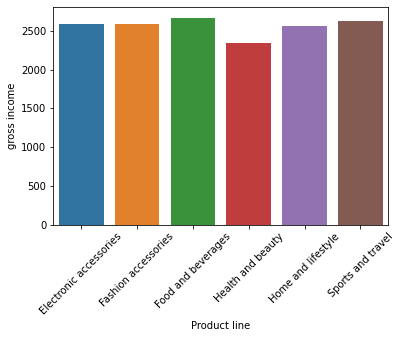

In [11]:
sns.barplot(x='Product line',y='gross income',data=b)
plt.xticks(rotation=45)





**food and beverages is the most gross income**

# **let's make deep analysis of branch C to know what make the most income**
# 

**as we can see C branch the most gross income**

and i will show the most rating branch

In [12]:
b=df.groupby('Branch')[['Rating']].mean().reset_index()
b

,Branch,Rating
0,A,7.027059
1,B,6.818072
2,C,7.072866


**Let's separate branch C so that we can analyze it individually**

In [13]:
b= df.groupby('Branch')
branch_C=b.get_group('C')


**and now let's but branch_C in Data frame**

In [14]:
branch_C=pd.DataFrame(branch_C)
branch_C

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
20,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,2/25/2019,11:24,Ewallet,430.20,4.761905,21.5100,4.8
34,183-56-6882,C,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.8840,417.5640,2/6/2019,10:42,Ewallet,397.68,4.761905,19.8840,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,1/23/2019,10:33,Cash,699.72,4.761905,34.9860,6.1
984,189-40-5216,C,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,1/9/2019,11:40,Cash,674.59,4.761905,33.7295,6.0
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,3/29/2019,19:12,Ewallet,823.40,4.761905,41.1700,4.3
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9


**let's see which day the most gross income**

In [15]:
df['Date']=pd.to_datetime(df['Date'])
df['weekday']=df['Date'].dt.day_name()


In [16]:
w= df.groupby('weekday')[['gross income']].sum().reset_index()
w


,weekday,gross income
0,Friday,2091.7305
1,Monday,1804.7180
2,Saturday,2672.4195
3,Sunday,2117.0425
4,Thursday,2159.4880
5,Tuesday,2451.5355
6,Wednesday,2082.4350


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

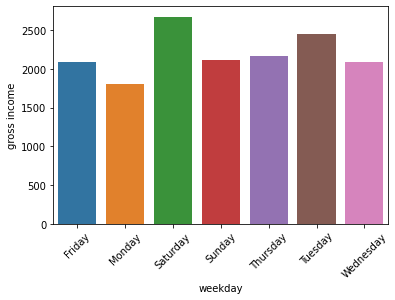

In [17]:
sns.barplot(x='weekday',y='gross income',data=w)
plt.xticks(rotation=45)

**saturday is the most income day**


In [18]:
df.nunique()


Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
weekday                       7
dtype: int64

**first ler's see the most customer type**

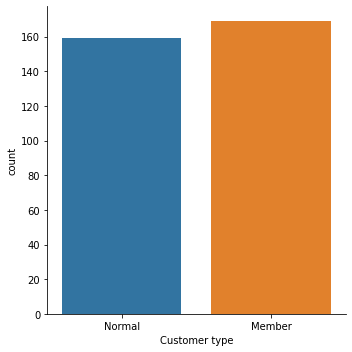

In [19]:
sns.catplot(x='Customer type',kind='count',data=branch_C)

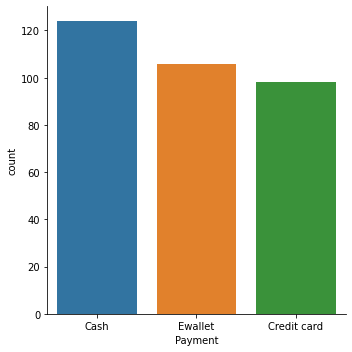

In [20]:
sns.catplot(x='Payment',kind='count',data=branch_C)


**as we can see the most Payment is cash**

**and i will go ferther to how customers type pay**

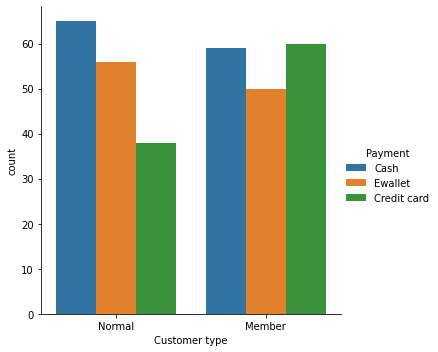

In [21]:
sns.catplot(x='Customer type',hue='Payment',kind='count',data=branch_C)

**let's see the gender of ower customers**

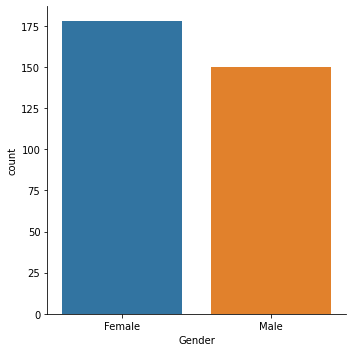

In [22]:
sns.catplot(x='Gender',kind='count',data=branch_C)

most from female

# **we will use statistics for deeper analysis**

In [23]:
x=branch_C[['Unit price','Quantity','Total','Rating','cogs','Tax 5%']]
y=branch_C[['gross income']]
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gross income   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.055e+32
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        04:09:46   Log-Likelihood:                 10078.
No. Observations:                 328   AIC:                        -2.015e+04
Df Residuals:                     323   BIC:                        -2.013e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.155e-14   3.81e-15     -3.031      0.003    -1.9e-14   -4.05e-15
Unit price  5.898e-17   4.66e-17      1.266      0.207   -3.27e-17    1.51e-16
Quantity    5.551e-16   4.76e-16      1.166      0.244   -3.81e-16    1.49e-15
Total          0.0249   3.71e-18   6.72e+15      0.000       0.025       0.025
Rating       2.22e-16   3.59e-16      0.619      0.536   -4.83e-16    9.27e-16
cogs           0.0238   3.53e-18   6.72e+15      0.000       0.024       0.024
Tax 5%         0.0012   1.77e-19   6.72e+15      0.000       0.001       0.001
==============================================================================
Omnibus:                       25.835   Durbin-Watson:                   1.471
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.515
Skew:                          -0.744   Prob(JB):                     2.36e-07
Kurtosis:                       2.856   Cond. No.                     7.15e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.26e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**i will divide the numbers to could know the correlation between them**

In [24]:
df_num = df[['Unit price','Quantity','Total','cogs','gross income','Rating']]


              Unit price  Quantity     Total      cogs  gross income    Rating
Unit price      1.000000  0.010778  0.633962  0.633962      0.633962 -0.008778
Quantity        0.010778  1.000000  0.705510  0.705510      0.705510 -0.015815
Total           0.633962  0.705510  1.000000  1.000000      1.000000 -0.036442
cogs            0.633962  0.705510  1.000000  1.000000      1.000000 -0.036442
gross income    0.633962  0.705510  1.000000  1.000000      1.000000 -0.036442
Rating         -0.008778 -0.015815 -0.036442 -0.036442     -0.036442  1.000000


<AxesSubplot:>

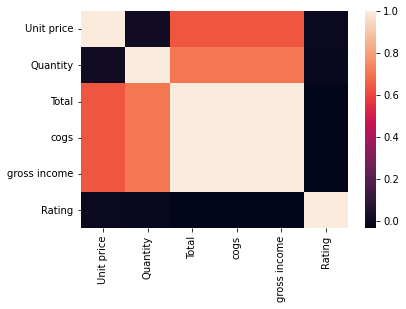

In [25]:
print(df_num.corr())
sns.heatmap(df_num.corr())